In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tsfresh.feature_extraction.feature_calculators import standard_deviation, fft_aggregated, linear_trend

In [27]:
df = pd.read_csv('../test.csv')
df.replace('Nan', np.nan, inplace = True)
df.dropna(inplace=True)
df['index'] = df.index

In [29]:
pat1 = df[(df.patient_number.isin([4]))]

In [30]:
def return_fft_array(arr):
    attrs = [
        {'aggtype': 'centroid'},
        {'aggtype': 'variance'},
        {'aggtype': 'skew'},
        {'aggtype': 'kurtosis'},
    ]
    fft_zip = fft_aggregated(arr,attrs)
    return [item[1] for item in list(fft_zip)]

def return_linear_trend_array(arr):
    params = [
        {'attr': 'pvalue'},
        {'attr': 'rvalue'},
        {'attr': 'slope'},
        {'attr': 'intercept'},
        {'attr': 'stderr'}
    ] 
    return [item[1] for item in linear_trend(arr, params)]

In [31]:
groups_sd = pat1.groupby(['patient_number','meal_number']).apply(lambda x: standard_deviation(x.cgm_data))
groups_rms = pat1.groupby(['patient_number','meal_number']).apply(lambda x: np.square(np.mean((x.cgm_data)**2)))
groups_fft = pat1.groupby(['patient_number','meal_number']).apply(lambda x: return_fft_array(x.cgm_data))
groups_lt = pat1.groupby(['patient_number', 'meal_number']).apply(lambda x: return_linear_trend_array(x.cgm_data))

In [33]:
groups_sd = groups_sd.reset_index()
groups_sd.rename(columns={0:'sd'}, inplace=True)

groups_rms = groups_rms.reset_index()
groups_rms.rename(columns={0:'rms'}, inplace=True)

temp = groups_fft.reset_index()[0].apply(pd.Series)
temp.rename(columns={0:'fft_centroid',1:'fft_variance', 2:'fft_skew',3:'fft_curtosis'},inplace=True)
groups_fft = pd.concat([groups_fft.reset_index(), temp], axis=1)
del groups_fft[0]

temp = groups_lt.reset_index()[0].apply(pd.Series)
temp.rename(columns={0:'pvalue',1:'rvalue', 2:'slope',3:'intercept',4:'stderr'},inplace=True)
groups_lt = pd.concat([groups_lt.reset_index(), temp], axis=1)
del groups_lt[0]



In [34]:
groups_lt

,patient_number,meal_number,pvalue,rvalue,slope,intercept,stderr
0,4,0,3.639136e-17,-0.957258,-4.130242,236.663306,0.231739
1,4,1,3.273516e-17,-0.961294,-6.962403,262.888172,0.377127
2,4,2,3.326784e-01,-0.183146,-0.899221,157.038710,0.912183
3,4,3,4.396556e-16,-0.953236,-4.662736,197.243011,0.279378
4,4,4,3.817183e-07,-0.779658,-2.509900,179.126882,0.380970
5,4,5,1.259534e-12,-0.916044,-4.283648,195.012903,0.354443
6,4,6,1.634338e-04,-0.635024,-3.200222,224.969892,0.735707
7,4,7,8.714500e-01,-0.030847,-0.086986,108.694624,0.532652
8,4,8,6.632626e-16,-0.951812,-8.491435,345.092473,0.517057
9,4,9,1.411132e-04,-0.639699,-2.290990,202.886022,0.520215


In [104]:
final = groups_sd
final = final.merge(groups_rms, how='left', on=['patient_number','meal_number'])
final = final.merge(groups_fft, how='left', on=['patient_number','meal_number'])


In [105]:
final

,patient_number,meal_number,sd,rms,fft_centroid,fft_variance,fft_skew,fft_curtosis
0,4,0,38.591486,1.024818e+09,1.543168,10.716469,2.489275,8.637137
1,4,1,62.689145,9.091632e+08,1.592816,10.622120,2.514530,8.800649
2,4,2,42.497059,5.081418e+08,0.551102,2.792875,5.306132,35.766873
3,4,3,42.337913,3.458596e+08,1.751027,11.544248,2.324471,7.859835
4,4,4,27.863875,4.472887e+08,1.099605,7.076696,3.192861,13.524909
5,4,5,40.474972,3.725144e+08,1.327176,9.548874,2.808934,10.323533
6,4,6,43.619325,1.141676e+09,0.385831,1.826220,5.925482,43.807562
7,4,7,24.407217,1.473221e+08,0.658731,3.747222,4.422567,24.815529
8,4,8,77.218082,3.050555e+09,1.548886,10.259026,2.528538,8.903713
9,4,9,30.998208,8.849237e+08,1.281038,9.286855,2.799328,10.365122


In [106]:
vectors = final.as_matrix(columns=['sd','rms','fft_centroid','fft_variance'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [107]:
standard_scaler = StandardScaler()
vectors_sd = standard_scaler.fit_transform(vectors)

In [339]:
data = pat1[(pat1.meal_number == 15) & (pat1.patient_number == 3)].cgm_data.to_numpy()
attrs = [
        {'aggtype': 'centroid'},
        {'aggtype': 'variance'},
        {'aggtype': 'skew'},
        {'aggtype': 'kurtosis'},
    ]
list(fft_aggregated(data,attrs))

[('aggtype_"centroid"', 0.13379341523069543),
 ('aggtype_"variance"', 0.3693291633467329),
 ('aggtype_"skew"', nan),
 ('aggtype_"kurtosis"', nan)]

In [109]:
pca = PCA()

In [137]:
pca.fit_transform(vectors_sd)[0]

array([ 1.35668445, -0.65262444, -0.47559425, -0.14314649])

In [111]:
pca.explained_variance_

array([2.56053579, 1.25841266, 0.24097959, 0.02007196])

In [112]:
pca.components_

array([[ 0.52632628,  0.20776848,  0.5884777 ,  0.57750057],
       [ 0.36953038,  0.81729572, -0.30426072, -0.32078096],
       [ 0.75843599, -0.53438791, -0.15795051, -0.33801782],
       [ 0.10584326, -0.05735442, -0.73223702,  0.67032576]])

In [115]:
cov = np.cov(vectors_sd.T)
ev , eig = np.linalg.eig(cov)
a = eig.dot(vectors_sd.T)

In [127]:
centered_data = vectors_sd - np.mean(vectors_sd)
U, S, V = np.linalg.svd(centered_data, full_matrices=False)
components = V
coefficients = np.dot(U, np.diag(S))

In [136]:
U[0]

array([-0.11990255, -0.08227479,  0.1370129 , -0.14288965])

In [75]:
np.array([[1,2,3],[4,5,6],[7,8,9]])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

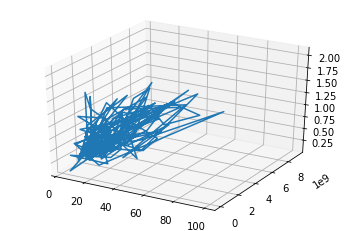

In [78]:
v= vectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(v[:,0],v[:,1],v[:,2])
plt.show()

In [99]:
vectors

array([[6.74878178e+01, 1.12300723e+09],
       [3.88066575e+01, 9.15725870e+09],
       [5.93795326e+01, 1.73513902e+09],
       [5.59036970e+01, 7.02442580e+08],
       [1.68240899e+01, 4.35778150e+08],
       [5.55856596e+01, 8.42247462e+08],
       [3.39738461e+01, 4.50444027e+08],
       [5.75865436e+01, 7.25758212e+08],
       [3.33460143e+01, 5.01704748e+08],
       [2.27914214e+01, 5.79435507e+08],
       [5.19784143e+01, 1.11846992e+09],
       [6.79026182e+01, 7.13030627e+08],
       [3.71074865e+01, 6.67059756e+08],
       [4.08890232e+01, 6.10338672e+08],
       [1.33739382e+01, 1.11709398e+08],
       [4.62018398e+01, 5.87883064e+08],
       [3.82397263e+01, 1.05910977e+09],
       [6.29088936e+01, 6.85308627e+08],
       [4.10217287e+01, 2.98407199e+08],
       [3.73683764e+01, 5.96307096e+08],
       [3.02279488e+01, 6.22971648e+08],
       [6.04611905e+00, 7.01964694e+07],
       [2.77977017e+01, 6.53209660e+08],
       [2.67425794e+01, 1.70134631e+08],
       [3.784924

In [100]:
stand_values

array([[ 1.89989055,  0.20250097],
       [ 0.18021839,  5.50068357],
       [ 1.41373196,  0.60617094],
       [ 1.20532694, -0.07484015],
       [-1.13781788, -0.25069186],
       [ 1.18625798,  0.0173541 ],
       [-0.10954852, -0.24102045],
       [ 1.30622748, -0.05946467],
       [-0.14719222, -0.2072166 ],
       [-0.78002713, -0.15595709],
       [ 0.96997387,  0.19950885],
       [ 1.92476125, -0.06785787],
       [ 0.07833907, -0.09817333],
       [ 0.30507339, -0.13557802],
       [-1.34468294, -0.46439881],
       [ 0.62362057, -0.15038636],
       [ 0.14622619,  0.16036383],
       [ 1.62534627, -0.08613913],
       [ 0.31303018, -0.34128105],
       [ 0.09398157, -0.14483113],
       [-0.33414597, -0.12724721],
       [-1.78404614, -0.49177449],
       [-0.47985933, -0.10730677],
       [-0.54312261, -0.42587033],
       [ 0.12281378, -0.05654669],
       [-1.05414269, -0.45712579],
       [-1.06616378, -0.47280068],
       [-0.99724986, -0.27538982],
       [-0.40930687,

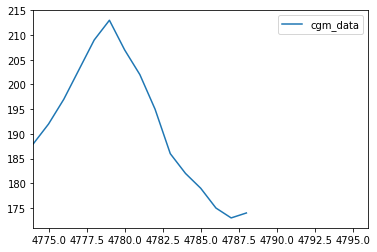

In [42]:
df[(df.patient_number == 4) & (df.meal_number == 12)][['cgm_data','time_data']].plot()

In [140]:
from sklearn.decomposition import LatentDirichletAllocation

In [141]:
from sklearn.datasets import load_iris

In [145]:
load_iris().data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [146]:
load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  